## Lab 10 Part II: Plotting Satellite Data
<br /><br />
In this part of the tutorial, we create visible satellite imagery to compare with our model-derived upper-air plots from Part I.
<br />
### Module Documentation
1. The datetime function from the datetime module: https://docs.python.org/3/library/datetime.html
2. Cartopy Feature: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
3. Matplotlib: https://matplotlib.org/
4. Matplotlib Normalize: https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Normalize.html



If you have any questions about the code below, feel free to reach out to me at mpvossen@uwm.edu. I am always willing to further explain the code. <br /> <br />

---

<br />
1. As usual, we start by importing the modules we need for our Python code.

In [2]:
#import everything from the metpy module
import metpy

#from the plotting portion of metpy, import the add_timestamp function
from metpy.plots import add_timestamp

#import the crs part of the cartopy module for geographic parts of the data such as map projections
import cartopy.crs as ccrs

#import the feature part of the cartopy module for things such as state lines
import cartopy.feature as cfeature

#import the pyplot part of the matplotlib module
import matplotlib.pyplot as plt

#import the datetime feature of the datetime module
from datetime import datetime

#from the matplotlib module, in the colors part, import the Normalize function.  This is for adjusting the colors we use to plot the satellite data.
from matplotlib.colors import Normalize

#import the module xarray and save it to xr
import xarray as xr

#add this line so that the JupyterHub plots the maps within the Jupyter Notebook
%matplotlib inline

<br /><br />
2. Once again, the necessary satellite data have already been downloaded for you.  The cell below opens a GOES-16 visible satellite file for September 23rd, 2022 at 1800 UTC. 

In [3]:
time = datetime(2022,9,23,18)

#Specifying the data's location.
lab_data_loc = "/data/AtmSci360/Lab_10/"

#Open the satellite data with xarray. 
sat_data = xr.open_dataset(f"{lab_data_loc}{time:%m%d%y_%H}_goes16.nc", engine="netcdf4")
sat_data

<xarray.Dataset>
Dimensions:                                           (y: 6000, x: 10000, number_of_time_bounds: 2, number_of_image_bounds: 2, band: 1, num_star_looks: 24)
Coordinates:
    t                                                 datetime64[ns] ...
  * y                                                 (y) float32 0.1282 ... ...
  * x                                                 (x) float32 -0.1014 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    band_id                                           (band) int8 ...
    band_wavelength                                   (band) float32 ...
    t_star_look                                       (num_star_looks) datetime64[ns] ...
    band_wavelength_star_look                         (num_star_looks) float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, band, num_star_looks
Data variables: (12/37)
    Rad                                               (y, x) float32 ...
    DQF                                               (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    ...                                                ...
    algorithm_dynamic_input_data_container            int32 ...
    processing_parm_version_container                 int32 ...
    algorithm_product_version_container               int32 ...
    star_id                                           (num_star_looks) float32 ...
    channel_integration_time                          float64 ...
    channel_gain_field                                float64 ...
Attributes: (12/30)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    production_site:           WCDAS
    ...                        ...
    timeline_id:               ABI Mode 6
    date_created:              2022-09-23T18:03:56.9Z
    time_coverage_start:       2022-09-23T18:01:17.3Z
    time_coverage_end:         2022-09-23T18:03:54.6Z
    LUT_Filenames:             SpaceLookParams(FM1A_CDRL79RevP_PR_09_00_02)-6...
    id:                        cdf34fc9-84fc-48ad-a48b-c91749b8c633

<br /> <br />
3. Since the data are in the same format as in Lab 4 Part II, use the code block below to parse out the satellite data, get the projection, set up the colormap, and plot the visible satellite data.  Be sure to have an appropriate color map, number of labels, and geographical references for your satellite image.  Finally, add an appropriate title.

/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iterati

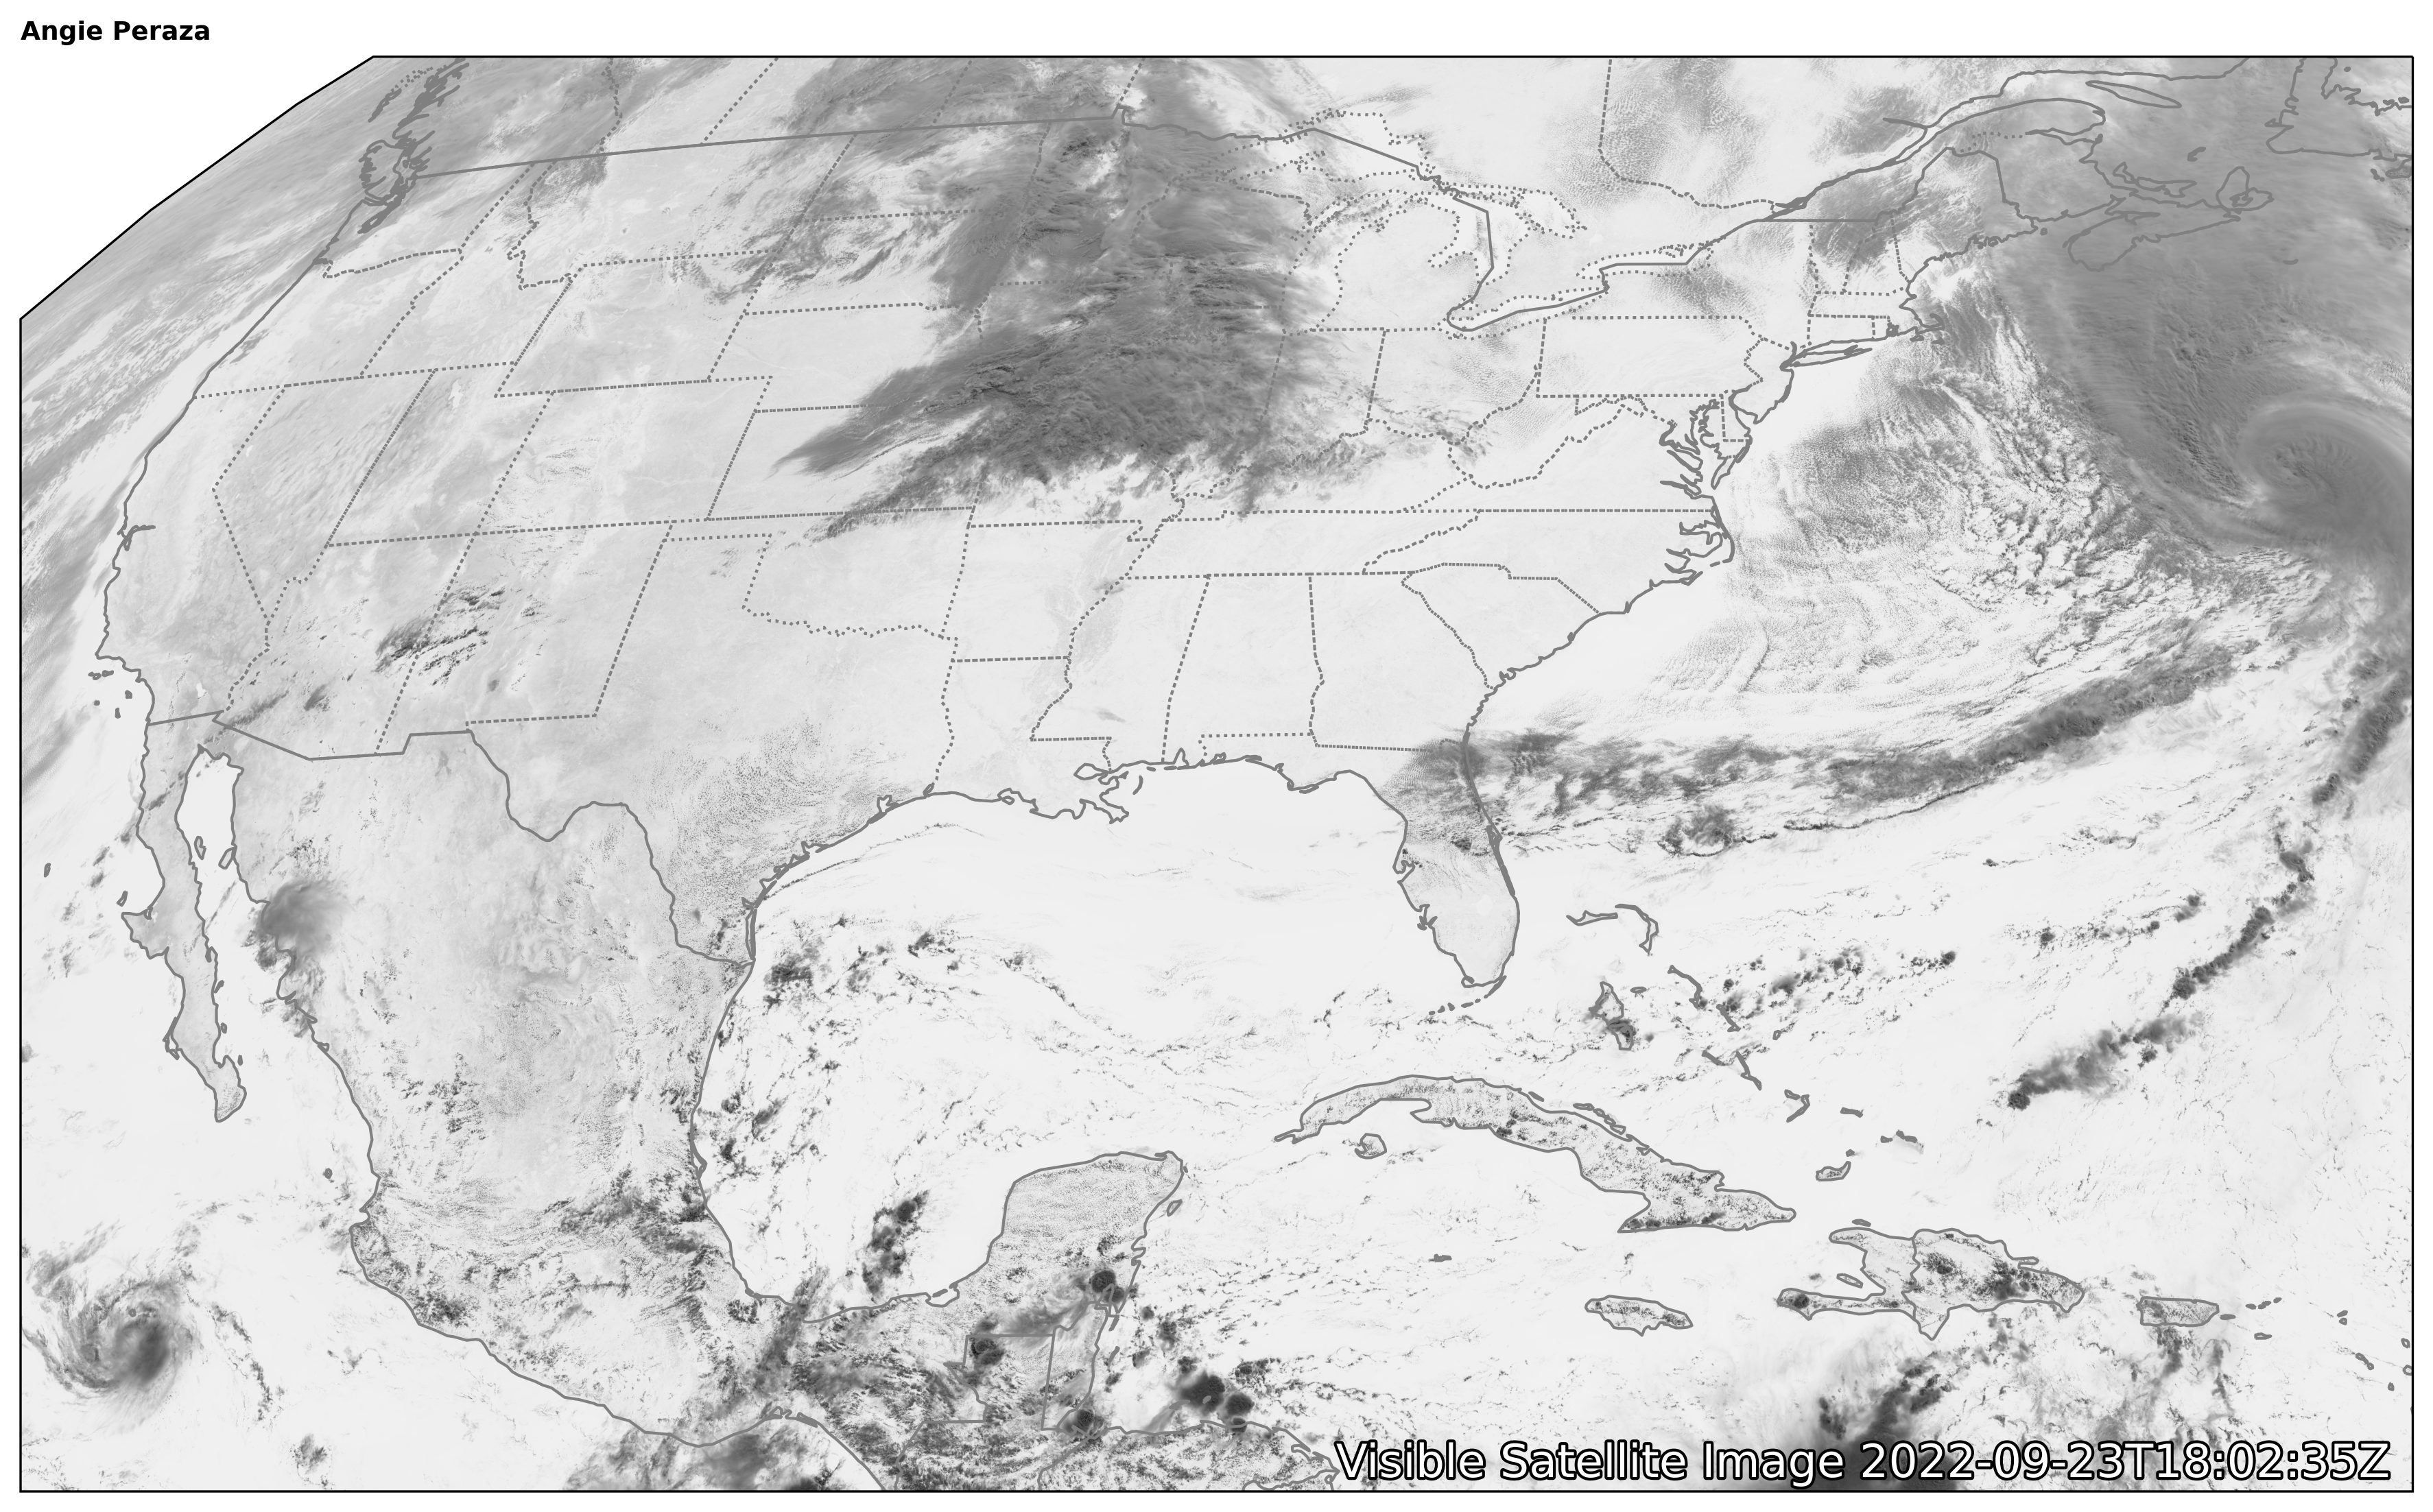

In [4]:
data = sat_data.metpy.parse_cf('Rad')
proj = data.metpy.cartopy_crs
x = data['x']
y = data['y']
color_range = Normalize(vmin=-25, vmax=data.max())
color_map = 'binary'
fig = plt.figure(figsize=(15, 15), dpi=300)


ax = fig.add_subplot(1, 1, 1, projection=proj)


ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1, edgecolor = 'grey')

ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':',linewidth = 1, edgecolor='grey')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1, edgecolor='grey')


im = ax.imshow(data, extent=(x.min(), x.max(), y.min(), y.max()), origin='upper', cmap=color_map, norm=color_range)


start_time = datetime.strptime(str(data.t.values)[:-3], 
                               '%Y-%m-%dT%H:%M:%S.%f') 


add_timestamp(ax, time=start_time, pretext='Visible Satellite Image ',
              high_contrast=True, fontsize=16, y=0.01)

plt.title("Angie Peraza",size=9, weight="bold",loc="left")


plt.show()

### You have now completed the Python portion part of Lab 10.  Be sure upload a fully rendered version of this Jupyter Notebook to your GitHub repository.